# KNN

In [12]:
import numpy as np

cfile = np.loadtxt('../dataset/coughvid_20211012/covid.txt')
print(cfile.shape)
hfile = np.loadtxt('../dataset/coughvid_20211012/healthy.txt')
print(hfile.shape)

(1000, 22050)
(1000, 22050)


In [13]:
from sklearn.model_selection import train_test_split
import librosa

data = np.vstack((cfile, hfile))
labels = np.full(len(data), fill_value='healthy')
labels[:len(cfile)] = 'covid'
print(data.shape)

mfccs = []
for i in range(len(data)):
    test = librosa.feature.mfcc(y=data[i])
    # print(test[0])
    temp = np.ravel((test - np.mean(test, axis=0)) / np.std(test, axis=0))
    mfccs.append(temp)
mfccs = np.array(mfccs)
print(mfccs.shape)

xtrain, xtest, ytrain, ytest = train_test_split(mfccs, labels, test_size=0.2, random_state=42)

(2000, 22050)
(2000, 880)


In [15]:
from sklearn.neighbors import KNeighborsClassifier

ns = np.arange(1, 11)
accs = []

for i in ns:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(xtrain, ytrain)

    acc = 0
    pred = neigh.predict(xtest)

    for j in range(len(pred)):
        if pred[j] == ytest[j]:
            acc += 1

    accs.append(acc/len(pred))

    print('KNN accuracy at neighbors = ', i, ': ', accs[-1])

KNN accuracy at neighbors =  1 :  0.5875
KNN accuracy at neighbors =  2 :  0.5675
KNN accuracy at neighbors =  3 :  0.5725
KNN accuracy at neighbors =  4 :  0.5675
KNN accuracy at neighbors =  5 :  0.535
KNN accuracy at neighbors =  6 :  0.5375
KNN accuracy at neighbors =  7 :  0.535
KNN accuracy at neighbors =  8 :  0.545
KNN accuracy at neighbors =  9 :  0.54
KNN accuracy at neighbors =  10 :  0.545


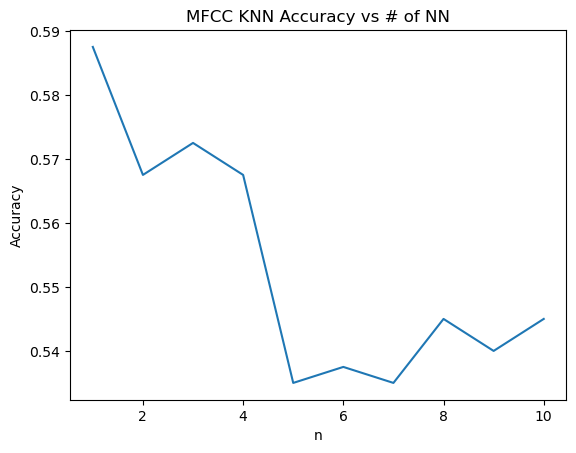

In [17]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(ns, accs)
plt.xlabel('n')
plt.ylabel('Accuracy')
plt.title('MFCC KNN Accuracy vs # of NN')
plt.show()

# SVM

In [6]:
from sklearn.svm import SVC
from copy import deepcopy

Cs = [0.01, 0.1, 1, 5, 10]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
info = dict()

for c in Cs:
    accs = []

    for k in kernels:
        svm = SVC(C=c, kernel=k)
        svm.fit(xtrain, ytrain)

        acc = 0
        pred = svm.predict(xtest)

        for j in range(len(pred)):
            if pred[j] == ytest[j]:
                acc += 1

        accs.append(acc/len(pred))
        print('Finished C=', c, ', kernel=', k,', with accuracy: ', accs[-1])

    label = 'C=%f' % c
    info[label] = deepcopy(accs)

Finished C= 0.01 , kernel= linear , with accuracy:  0.55
Finished C= 0.01 , kernel= poly , with accuracy:  0.4975
Finished C= 0.01 , kernel= rbf , with accuracy:  0.4975
Finished C= 0.01 , kernel= sigmoid , with accuracy:  0.4975
Finished C= 0.1 , kernel= linear , with accuracy:  0.5325
Finished C= 0.1 , kernel= poly , with accuracy:  0.515
Finished C= 0.1 , kernel= rbf , with accuracy:  0.5
Finished C= 0.1 , kernel= sigmoid , with accuracy:  0.5
Finished C= 1 , kernel= linear , with accuracy:  0.495
Finished C= 1 , kernel= poly , with accuracy:  0.545
Finished C= 1 , kernel= rbf , with accuracy:  0.54
Finished C= 1 , kernel= sigmoid , with accuracy:  0.56
Finished C= 5 , kernel= linear , with accuracy:  0.4825
Finished C= 5 , kernel= poly , with accuracy:  0.55
Finished C= 5 , kernel= rbf , with accuracy:  0.54
Finished C= 5 , kernel= sigmoid , with accuracy:  0.53
Finished C= 10 , kernel= linear , with accuracy:  0.4975
Finished C= 10 , kernel= poly , with accuracy:  0.56
Finished C=

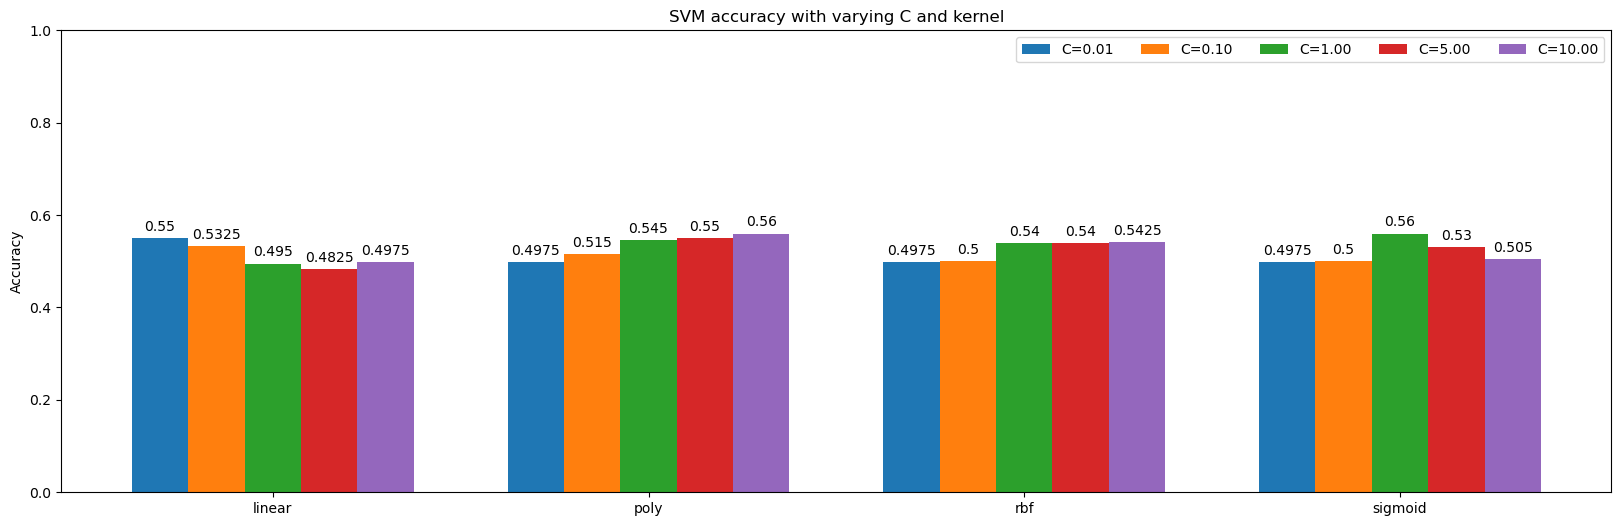

In [7]:
x = np.arange(len(kernels))
width = 0.15
multiplier = 0

fig, ax = plt.subplots(figsize=(20,6))#, layout='tight')

for key, value in info.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, value, width, label=key[:-4])
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Accuracy')
ax.set_title('SVM accuracy with varying C and kernel')
ax.set_xticks(x + 2*width, kernels)
ax.legend(loc='upper right', ncols=5)
ax.set_ylim(0, 1)

plt.show()

# ML

https://colab.research.google.com/drive/1z1M2phPYUdkRVvp0bQKJLfALBhk4W-mL?usp=sharing

Accuracy after 20 epochs (lr = 1e-4, Adam, MSELoss) = 60

# Highest Accuracies
KNN: 58.75% at k=1

SVM: 56% at C=10/poly and C=1/sigmoid

ML: 60%